In [2]:
import warnings
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import imblearn.over_sampling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# from sklearn.metrics import precision_recall_curve

In [5]:
from xgboost import XGBClassifier

In [6]:
# from notebook_pbar import * # import my notebook_pbar.py file
# timelist = timelist # import the default variables timelist and then_time
# then_time = then_time

In [7]:
# function cm_val creates an interactive confusion matrix on un-scaled data.
# function cm_val_scaled creates an interactive confusion matrix on scaled data.
from my_functions import cm_val
from my_functions import cm_val_scaled
# function y_pred_inverse extracts the predictive probability from predict_proba.
from my_functions import y_pred_inverse
# function plot_validation_curve_log plots a validation curve on a log scale.
# function plot_validation_curve_reg plots a validation curve on a default scale.
from my_functions import plot_validation_curve_log
from my_functions import plot_validation_curve_reg
# function plot_learning_curve_reg plots a learning curve on a default scale.
from my_functions import plot_learning_curve
# function plot_decision_tree uses graphviz to visualize the splits of a devision tree.
from my_functions import plot_decision_tree
# function train_and_calibrate_cv performs stratified shuffle split on a specified model,
# returning validation scores and roc/auc.
from my_functions import train_and_calibrate_cv

In [8]:
warnings.filterwarnings('ignore')

In [9]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
np.random.seed(42)

In [12]:
df = pd.read_pickle('pickle/df_modeling.pkl')

In [13]:
len(df)

9115

In [14]:
df.drop(['cow_code', 'year', 'state_name', 'export_import_ratio', 'avg_hostility_level', 'military_expenditure', 'military_personnel', 'num_wars', 'num_conflicts'], axis = 1).columns

Index(['num_trade_states', 'export_dollars', 'import_dollars',
       'prim_energy_consumption', 'total_pop', 'cinc_score', 'num_alliances',
       'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
       'neutrality_treaties', 'nonaggression_treaties', 'entente_treaties',
       'avg_cum_duration', 'ongoing_2010', 'revision_pct',
       'num_leadership_changes', 'leader_tenure', 'age_govt',
       'num_transitions_ever', 'Americas', 'Asia', 'Europe', 'Oceania',
       'Indirect election', 'Nonelective', 'No legislature exists',
       'Non‐elective legislature', 'Appointed', 'Closed', 'Elected',
       'All parties legally banned', 'Legally single party state',
       'Multiple parties legally allowed', 'Multiple parties', 'No parties',
       'One party', 'Multiple parties outside regime',
       'No parties outside regime', 'One party outside regime',
       'Legislature with multiple parties',
       'No legislature or all nonpartisan', 'Only members from regime 

In [15]:
df.drop(['cow_code', 'year', 'state_name', 'export_import_ratio', 'avg_hostility_level',
             'military_expenditure', 'military_personnel', 'num_wars', 'num_conflicts',
             'war_present', 'revision_pct', 'avg_cum_duration'], axis = 1).sum()

num_trade_states                               1395140.000
export_dollars                         158215503813141.281
import_dollars                         158243361464238.688
prim_energy_consumption               1176329088000000.000
total_pop                                 266477614000.000
cinc_score                                          63.399
num_alliances                                   120407.000
pre_1816_alliances                                 126.000
num_in_effect_1231_2012                         102323.000
defense_treaties                                 95462.000
neutrality_treaties                               2086.000
nonaggression_treaties                           90735.000
entente_treaties                                103066.000
ongoing_2010                                        19.850
num_leadership_changes                            2040.000
leader_tenure                                    68636.000
age_govt                                        285851.0

In [16]:
X = df.drop(['cow_code', 'year', 'state_name', 'export_import_ratio', 'avg_hostility_level',
             'military_expenditure', 'military_personnel', 'num_wars', 'num_conflicts',
             'war_present', 'revision_pct', 'avg_cum_duration', 'ongoing_2010'], axis = 1)

y = df['war_present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1001)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1001)

In [17]:
df['war_present'].value_counts()

0    8871
1     244
Name: war_present, dtype: int64

In [18]:
continuous_columns = ['num_trade_states', 'export_dollars', 'import_dollars',
                      'prim_energy_consumption', 'total_pop', 'cinc_score',
                      'num_alliances', 'pre_1816_alliances', 'num_in_effect_1231_2012',
                      'defense_treaties', 'neutrality_treaties', 'nonaggression_treaties',
                      'entente_treaties', 'leader_tenure',
                      'age_govt', 'num_transitions_ever', 'num_leadership_changes']

X_train_cont = X_train[continuous_columns]
X_train_cont = X_train_cont.reset_index()
X_train_cont.drop(['index'], axis = 1, inplace = True)

X_train_dummy = X_train.drop(continuous_columns, axis = 1)
X_train_dummy = X_train_dummy.reset_index()
X_train_dummy.drop(['index'], axis = 1, inplace = True)

# X_val_cont = X_val[continuous_columns]
# X_val_cont = X_val_cont.reset_index()
# X_val_cont.drop(['index'], axis = 1, inplace = True)

# X_val_dummy = X_val.drop(continuous_columns, axis = 1)
# X_val_dummy = X_val_dummy.reset_index()
# X_val_dummy.drop(['index'], axis = 1, inplace = True)

X_test_cont = X_test[continuous_columns]
X_test_cont = X_test_cont.reset_index()
X_test_cont.drop(['index'], axis = 1, inplace = True)

X_test_dummy = X_test.drop(continuous_columns, axis = 1)
X_test_dummy = X_test_dummy.reset_index()
X_test_dummy.drop(['index'], axis = 1, inplace = True)

In [19]:
scaler = MinMaxScaler()

X_train_cont_scaled = pd.DataFrame(scaler.fit_transform(X_train_cont))
X_train_cont_scaled = X_train_cont_scaled.reset_index()
X_train_cont_scaled.drop(['index'], axis = 1, inplace = True)
X_train_cont_scaled.columns = continuous_columns

# X_val_cont_scaled = pd.DataFrame(scaler.fit_transform(X_val_cont))
# X_val_cont_scaled = X_val_cont_scaled.reset_index()
# X_val_cont_scaled.drop(['index'], axis = 1, inplace = True)
# X_val_cont_scaled.columns = continuous_columns

X_test_cont_scaled = pd.DataFrame(scaler.transform(X_test_cont))
X_test_cont_scaled = X_test_cont_scaled.reset_index()
X_test_cont_scaled.drop(['index'], axis = 1, inplace = True)
X_test_cont_scaled.columns = continuous_columns

X_train_scaled = pd.concat([X_train_cont_scaled, X_train_dummy], axis = 1)
# X_val_scaled = pd.concat([X_val_cont_scaled, X_val_dummy], axis = 1)
X_test_scaled = pd.concat([X_test_cont_scaled, X_test_dummy], axis = 1)

In [20]:
pd.DataFrame(y_train)['war_present'].value_counts()

0    7084
1     208
Name: war_present, dtype: int64

In [21]:
# pd.DataFrame(y_val)['war_present'].value_counts()

In [22]:
# used smote to perform upsampling with added variance for all subsets of my data,
# renaming them so that I still have the original versions that are not oversampled.
smote = imblearn.over_sampling.SMOTE(ratio = {0: 7084, 1: (7084)}, random_state = 101)
X_train_scaled, y_train = smote.fit_sample(X_train_scaled, y_train)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X.columns
y_train = pd.DataFrame(y_train)
y_train.columns = ['war_present']

# smote = imblearn.over_sampling.SMOTE(ratio = {0: 1775, 1: (1775)}, random_state = 101)
# X_val_scaled, y_val = smote.fit_sample(X_val_scaled, y_val)

# X_val_scaled = pd.DataFrame(X_val_scaled)
# X_val_scaled.columns = X.columns
# y_val = pd.DataFrame(y_val)
# y_val.columns = ['war_present']

In [23]:
from sklearn.metrics import accuracy_score

In [33]:
print(X_train_scaled.shape)
# print(X_val_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
# print(y_val.shape)
print(y_test.shape)

(14168, 64)
(1823, 64)
(14168, 1)
(1823,)


In [34]:
lr = LogisticRegression(penalty = 'l1')
lr.fit(X_train_scaled, y_train)
predictions = lr.predict(X_test_scaled)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1787
           1       0.05      0.56      0.09        36

   micro avg       0.79      0.79      0.79      1823
   macro avg       0.52      0.67      0.49      1823
weighted avg       0.97      0.79      0.86      1823

[[1412  375]
 [  16   20]]


In [35]:
lr = LogisticRegression(penalty = 'l2')
lr.fit(X_train_scaled, y_train)
predictions = lr.predict(X_test_scaled)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1787
           1       0.05      0.56      0.09        36

   micro avg       0.79      0.79      0.79      1823
   macro avg       0.52      0.67      0.49      1823
weighted avg       0.97      0.79      0.86      1823

[[1412  375]
 [  16   20]]


In [36]:
from sklearn.metrics import fbeta_score, make_scorer

In [37]:
# fbeta = make_scorer(fbeta_score, average = 'weighted', beta = 0.5)
fbeta = make_scorer(fbeta_score, pos_label = 1, average = 'binary', beta = 0.5)

In [38]:
cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 101)
param_grid = {'n_estimators': [300], 'max_depth': np.arange(3, 10), 'max_features': np.arange(3, 7), 'min_samples_split': np.arange(6, 7), 'min_samples_leaf': np.arange(2, 7), 'bootstrap': [True, False]}
rand = RandomizedSearchCV(RandomForestClassifier(random_state = 101), param_distributions = param_grid, cv = cv, scoring = fbeta, refit = True, random_state = 101)
rand.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
          error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [300], 'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'max_features': array([3, 4, 5, 6]), 'min_samples_split': array([6]), 'min_samples_leaf': array([2, 3, 4, 5, 6]), 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          return_train_score='warn',
          scoring=make_scorer(fbe

In [39]:
predictions = rand.predict(X_train_scaled)
print(rand.cv_results_['mean_train_score'].mean())
print(rand.cv_results_['mean_test_score'].mean())
print('')
print(rand.best_params_)
print(metrics.classification_report(y_train, predictions))
print(metrics.confusion_matrix(y_train, predictions))

0.9122627007614487
0.9059352943706088

{'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 9, 'bootstrap': False}
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      7084
           1       0.95      1.00      0.97      7084

   micro avg       0.97      0.97      0.97     14168
   macro avg       0.97      0.97      0.97     14168
weighted avg       0.97      0.97      0.97     14168

[[6703  381]
 [  31 7053]]


In [81]:
# is this formula for adjusted_r_squared correct?
r_squared = rand.score(y_test, predictions)
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# created new confusion matrix for tuned model.
print('\n', metrics.classification_report(y_test, predictions))

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, predictions))
df_cm.rename({0: 'Peace', 1: 'War'}, axis = 1, inplace = True)
df_cm.rename(index = {0: 'Peace', 1: 'War'}, inplace = True)

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.set_context(font_scale = 1.2)
sns.heatmap(df_cm, annot = True, fmt = 'g', cbar = False, cmap = 'cividis')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label');
ax.xaxis.set_ticks_position('top') 
plt.tight_layout()

In [40]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)

params_grid = {
    'max_depth': [6],
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': np.linspace(0.5, 1, 2, 3)
}

params_fixed = {
    'objective':'binary:logistic',
    'silent': 1
}

best_grid = GridSearchCV(
    estimator = XGBClassifier(**params_fixed, seed = 42),
    param_grid = params_grid,
    cv = cv,
    scoring = 'roc_auc'

)

In [41]:
best_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [6], 'n_estimators': [50, 100, 200, 300, 400], 'learning_rate': array([0.5, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [42]:
print("Best accuracy obtained {0}".format(best_grid.best_score_))
print("Parameters:")
for key, value in best_grid.best_params_.items():
    print("\t{}: {}".format(key, value))

Best accuracy obtained 0.9993203954172565
Parameters:
	learning_rate: 0.5
	max_depth: 6
	n_estimators: 100


In [43]:
predictions = best_grid.predict(X_test)


               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1787
           1       0.00      0.00      0.00        36

   micro avg       0.98      0.98      0.98      1823
   macro avg       0.49      0.50      0.50      1823
weighted avg       0.96      0.98      0.97      1823



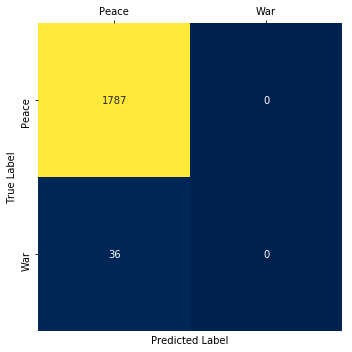

In [44]:
# created new confusion matrix for tuned model.
print('\n', metrics.classification_report(y_test, predictions))

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, predictions))
df_cm.rename({0: 'Peace', 1: 'War'}, axis = 1, inplace = True)
df_cm.rename(index = {0: 'Peace', 1: 'War'}, inplace = True)

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.set_context(font_scale = 1.2)
sns.heatmap(df_cm, annot = True, fmt = 'g', cbar = False, cmap = 'cividis')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label');
ax.xaxis.set_ticks_position('top') 
plt.tight_layout()